**SCRAPING OF EUR/INR CURRENCY DATA FROM 1  JANUARY 2023 TO 30 SEPTEMBER 2024 AND A TECHINCAL ANALYSIS OF THAT PERIOD (VISUAL REPRESENTATION )**

[*********************100%***********************]  1 of 1 completed


DataFrame Structure:
Price                      Adj Close      Close       High        Low  \
Ticker                      EURINR=X   EURINR=X   EURINR=X   EURINR=X   
Date                                                                    
2023-01-02 00:00:00+00:00  88.482002  88.482002  88.400002  87.157700   
2023-01-03 00:00:00+00:00  88.300003  88.300003  88.313004  87.225998   
2023-01-04 00:00:00+00:00  87.219002  87.219002  87.922997  87.219002   
2023-01-05 00:00:00+00:00  87.605003  87.605003  87.807999  86.757004   
2023-01-06 00:00:00+00:00  86.827003  86.827003  87.614998  86.647003   
...                              ...        ...        ...        ...   
2024-09-23 00:00:00+00:00  93.110001  93.110001  93.202003  92.266701   
2024-09-24 00:00:00+00:00  92.753998  92.753998  93.248001  92.671997   
2024-09-25 00:00:00+00:00  93.438004  93.438004  93.627998  93.083000   
2024-09-26 00:00:00+00:00  93.000999  93.000999  93.467003  92.994003   
2024-09-27 00:00:00+00:00  93.

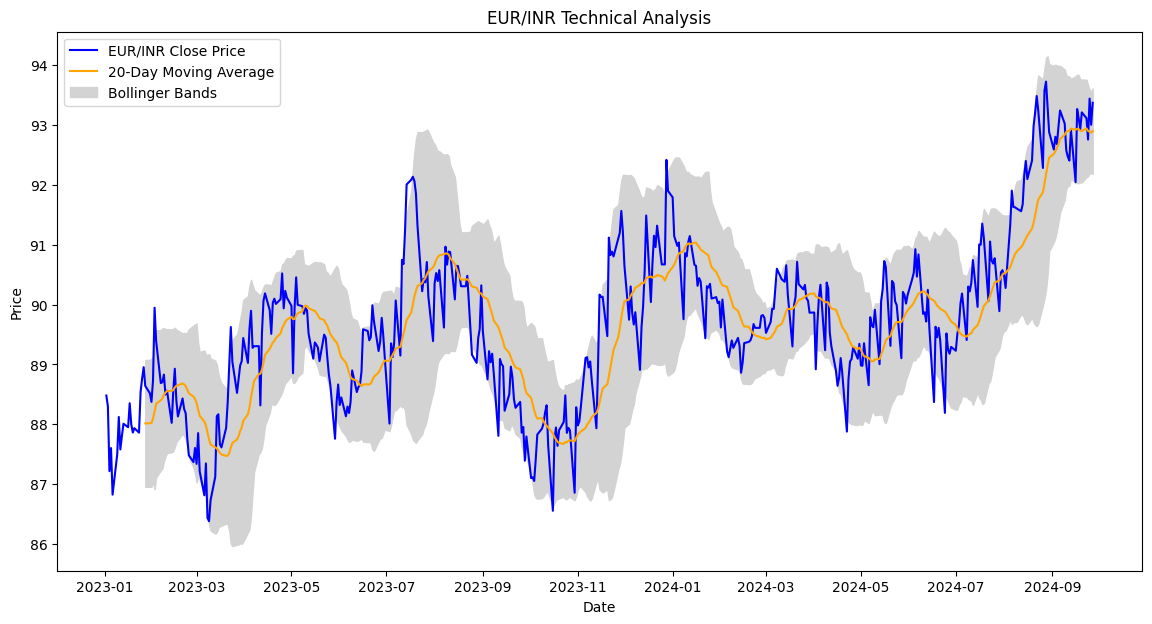

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 # Downloading EUR/INR currency data using yfinance
start_date = '2023-01-01'
end_date = '2024-09-30'
data = yf.download('EURINR=X', start=start_date, end=end_date)

# Displaying the entire DataFrame structure to understand its contents
print("DataFrame Structure:")
print(data)

# Checking if the DataFrame is empty
if data.empty:
    print("No data was retrieved. Please check the ticker symbol or date range.")
else:
    # Displaying column names and types
    print("\nColumns in DataFrame:")
    print(data.columns)

    # Accessing the relevant columns with multi-level indexing
    close = data['Close']['EURINR=X']
    high = data['High']['EURINR=X']
    low = data['Low']['EURINR=X']

    # Ensuring that the data is clean and numeric
    try:
        close = pd.to_numeric(close, errors='coerce')
        high = pd.to_numeric(high, errors='coerce')
        low = pd.to_numeric(low, errors='coerce')

        # Combining into a new DataFrame for easier calculations
        cleaned_data = pd.DataFrame({'Close': close, 'High': high, 'Low': low})
        cleaned_data.dropna(inplace=True)

        # Step 2: Technical Analysis Metrics Calculation
        def calculate_technical_indicators(data):
            # Moving Average
            data['MA_20'] = data['Close'].rolling(window=20).mean()

            # Bollinger Bands
            data['Upper_Band'] = data['MA_20'] + (data['Close'].rolling(window=20).std() * 2)
            data['Lower_Band'] = data['MA_20'] - (data['Close'].rolling(window=20).std() * 2)

            # CCI (Commodity Channel Index)
            typical_price = (data['High'] + data['Low'] + data['Close']) / 3
            sma_typical_price = typical_price.rolling(window=20).mean()
            mean_deviation = (typical_price - sma_typical_price).abs().rolling(window=20).mean()
            data['CCI'] = (typical_price - sma_typical_price) / (0.015 * mean_deviation)

        calculate_technical_indicators(cleaned_data)

        # Step 3: Decision Making Based on Indicators
        latest_data = cleaned_data.iloc[-1]
        decisions = {
            'Moving Average': 'BUY' if latest_data['Close'] > latest_data['MA_20'] else 'SELL',
            'Bollinger Band': 'BUY' if latest_data['Close'] < latest_data['Lower_Band'] else 'SELL',
            'CCI': 'BUY' if latest_data['CCI'] < -100 else ('SELL' if latest_data['CCI'] > 100 else 'NEUTRAL')
        }

        print("\nDecisions based on indicators:")
        print(decisions)

        # Visualization of metrics
        plt.figure(figsize=(14, 7))
        plt.plot(cleaned_data.index, cleaned_data['Close'], label='EUR/INR Close Price', color='blue')
        plt.plot(cleaned_data.index, cleaned_data['MA_20'], label='20-Day Moving Average', color='orange')
        plt.fill_between(cleaned_data.index, cleaned_data['Upper_Band'], cleaned_data['Lower_Band'], color='lightgrey', label='Bollinger Bands')
        plt.title('EUR/INR Technical Analysis')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"An error occurred during processing: {e}")

**TABLE DISPLAYING DECISIONS(BUY,SELL,NEUTRAL) BASED ON THE INDICATORS MOVING AVERAGE,BOLLINGER BAND AND CCI.**

In [ ]:
import pandas as pd

#  Decisions based on indicators
decisions = {
    'Moving Average': 'BUY',
    'Bollinger Band': 'SELL',
    'CCI': 'SELL'
}

# Create a DataFrame from the decisions dictionary
decisions_df = pd.DataFrame(list(decisions.items()), columns=['Indicator', 'Decision'])


print("\nDecisions Table:")
print(decisions_df)



Decisions Table:
        Indicator Decision
0  Moving Average      BUY
1  Bollinger Band     SELL
2             CCI     SELL


**TECHNICAL ANALYSIS FROM 30 SEPTEMBER 2024 TO 10 OCTOBER 2024**

[*********************100%***********************]  1 of 1 completed


DataFrame Structure:
Price                      Adj Close      Close       High        Low  \
Ticker                      EURINR=X   EURINR=X   EURINR=X   EURINR=X   
Date                                                                    
2024-09-30 00:00:00+00:00  93.369003  93.369003  93.839996  92.414001   
2024-10-01 00:00:00+00:00  93.234001  93.234001  93.309998  92.685997   
2024-10-02 00:00:00+00:00  92.713997  92.713997  92.989998  92.572998   
2024-10-03 00:00:00+00:00  92.617996  92.617996  92.800003  92.433998   
2024-10-04 00:00:00+00:00  92.634003  92.634003  92.643997  91.985001   

Price                           Open   Volume  
Ticker                      EURINR=X EURINR=X  
Date                                           
2024-09-30 00:00:00+00:00  92.414001        0  
2024-10-01 00:00:00+00:00  93.240997        0  
2024-10-02 00:00:00+00:00  92.721001        0  
2024-10-03 00:00:00+00:00  92.608002        0  
2024-10-04 00:00:00+00:00  92.637001        0  

Columns i

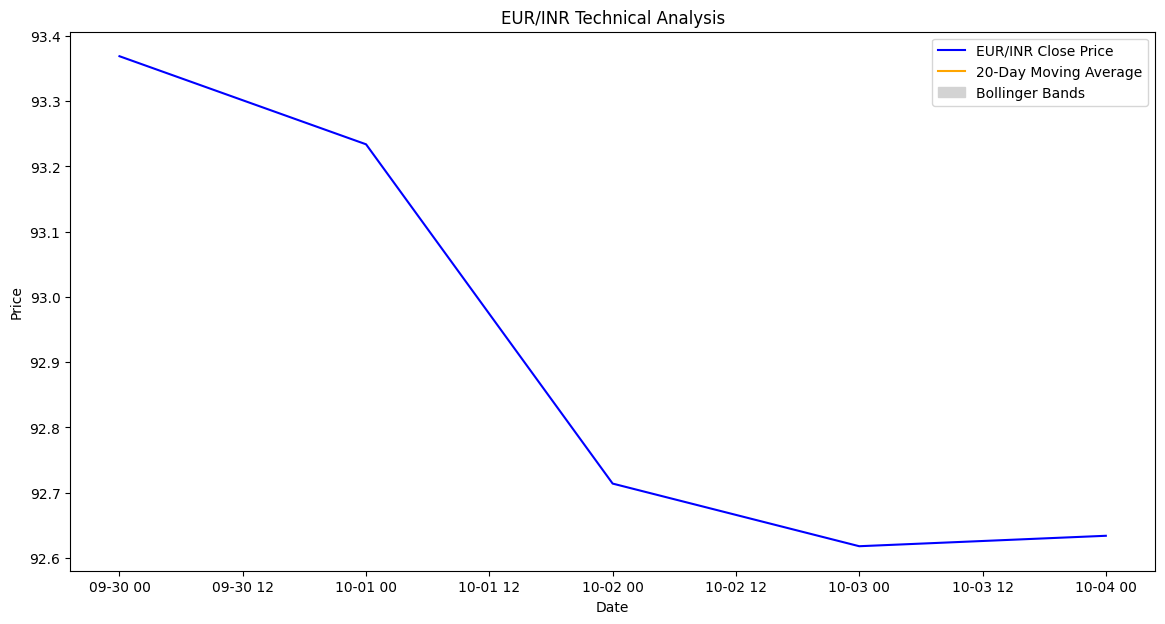

In [ ]:


 # Downloading EUR/INR currency data using yfinance
start_date = '2024-09-30'
end_date = '2024-10-07'
data = yf.download('EURINR=X', start=start_date, end=end_date)

# Displaying the entire DataFrame structure to understand its contents
print("DataFrame Structure:")
print(data)

# Checking if the DataFrame is empty
if data.empty:
    print("No data was retrieved. Please check the ticker symbol or date range.")
else:
    # Displaying column names and types
    print("\nColumns in DataFrame:")
    print(data.columns)

    # Accessing the relevant columns with multi-level indexing
    close = data['Close']['EURINR=X']
    high = data['High']['EURINR=X']
    low = data['Low']['EURINR=X']

    # Ensuring that the data is clean and numeric
    try:
        close = pd.to_numeric(close, errors='coerce')
        high = pd.to_numeric(high, errors='coerce')
        low = pd.to_numeric(low, errors='coerce')

        # Combining into a new DataFrame for easier calculations
        cleaned_data = pd.DataFrame({'Close': close, 'High': high, 'Low': low})
        cleaned_data.dropna(inplace=True)

        # Step 2: Technical Analysis Metrics Calculation
        def calculate_technical_indicators(data):
            # Moving Average
            data['MA_20'] = data['Close'].rolling(window=20).mean()

            # Bollinger Bands
            data['Upper_Band'] = data['MA_20'] + (data['Close'].rolling(window=20).std() * 2)
            data['Lower_Band'] = data['MA_20'] - (data['Close'].rolling(window=20).std() * 2)

            # CCI (Commodity Channel Index)
            typical_price = (data['High'] + data['Low'] + data['Close']) / 3
            sma_typical_price = typical_price.rolling(window=20).mean()
            mean_deviation = (typical_price - sma_typical_price).abs().rolling(window=20).mean()
            data['CCI'] = (typical_price - sma_typical_price) / (0.015 * mean_deviation)

        calculate_technical_indicators(cleaned_data)

        # Step 3: Decision Making Based on Indicators
        latest_data = cleaned_data.iloc[-1]
        decisions = {
            'Moving Average': 'BUY' if latest_data['Close'] > latest_data['MA_20'] else 'SELL',
            'Bollinger Band': 'BUY' if latest_data['Close'] < latest_data['Lower_Band'] else 'SELL',
            'CCI': 'BUY' if latest_data['CCI'] < -100 else ('SELL' if latest_data['CCI'] > 100 else 'NEUTRAL')
        }

        print("\nDecisions based on indicators:")
        print(decisions)

        # Visualization of metrics
        plt.figure(figsize=(14, 7))
        plt.plot(cleaned_data.index, cleaned_data['Close'], label='EUR/INR Close Price', color='blue')
        plt.plot(cleaned_data.index, cleaned_data['MA_20'], label='20-Day Moving Average', color='orange')
        plt.fill_between(cleaned_data.index, cleaned_data['Upper_Band'], cleaned_data['Lower_Band'], color='lightgrey', label='Bollinger Bands')
        plt.title('EUR/INR Technical Analysis')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"An error occurred during processing: {e}")